# Notify

In [287]:
import pandas as pd
import matplotlib
import pprint
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math

In [288]:
def format_table_text(latex_text):
    new_str = latex_text 
    new_str = new_str.replace("data\_size","data")
    new_str = new_str.replace("data_size","data")
    new_str = new_str.replace("data","Data [Byte]")
    new_str = new_str.replace("duration","Duration [µs]")
    new_str = new_str.replace("mtu_size","mtu.")
    new_str = new_str.replace("mtu\_size","mtu.")
    new_str = new_str.replace("mtu.","MTU [Byte]")
    new_str = new_str.replace("pakets","Pakets")
    new_str = new_str.replace("type","Record-Mode")
    new_str = new_str.replace("request_type","Transfer-Approach")
    new_str = new_str.replace("conn_interval","ci.")    
    new_str = new_str.replace("conn\_interval","ci.")    
    new_str = new_str.replace("Connection-Interval","ci.")    
    new_str = new_str.replace("ci.","Connection-Interval-Length [ms]")
    return new_str


In [289]:
df_hci = pd.read_csv("HCI_Output.csv").drop("Unnamed: 0",axis=1)
#df_ota = pd.read_csv("OTA_Output.csv").drop("Unnamed: 0",axis=1)

df_hci['type'] = ['HCI']*len(df_hci.index.values)
#df_ota['type'] = ['OTA']*len(df_ota.index.values)

#print(df_hci.shape,df_ota.shape)
#df_all = df_hci.append(df_ota)
df_all = df_hci
df_all.sort_values("starting_time")
print(df_all.columns)
df_all.drop(["data"],inplace=True,axis=1)

request_naming = dict({"WRITE_COMMAND Req":"NOTIFY-Approach","WRITE_COMMAND Rcvd":"NOTIFY-Approach","READ Req":"READ-Approach"})
df_all.replace(request_naming,inplace=True)

Index(['request_type', 'starting_time', 'ending_time', 'duration', 'data_size',
       'mtu_size', 'conn_interval', 'data', 'read_requests', 'read_responses',
       'notifies', 'type'],
      dtype='object')


In [290]:
def create_str(length):
    standardOutput = "Data Size " + str(length)
    content = ""
    i = len(standardOutput)
    while i < length:
        content += chr(97+(i%26))
        i+=1
    return standardOutput+content

### Value column does not contain all chars of string => can't check validity by data

In [291]:

#df_all['expected_data'] = df_all['data_size'].apply(create_str)
#df_all['is_complete'] = df_all['expected_data'] == df_all['data']
#df_all = df_all[df_all['is_complete']]
#df_all.drop(["data","is_complete","expected_data"],inplace=True,axis=1)
#df_all.groupby(["data_size","mtu_size","conn_interval","request_type","type"]).count()

In [292]:
#pd.set_option('display.max_rows', df_all.shape[0]+1)
#df_all[["type","request_type","data","expected_data","is_complete"]]

In [293]:
pprint.pprint(set(list(df_all['mtu_size'].values)))

{32, 256, 64, 128, 33, 35, 65, 67, 129, 131, 23, 25}


In [294]:
df_all = df_all[df_all['request_type'].str.contains("NOTIFY")]


In [295]:
def calc_rec_pakets(row):
    overhead = 1 
    if "NOTIFY" in row['request_type']:
        overhead = 3
    return math.ceil(row["data_size"]/(row["mtu_size"]-overhead))
def check_valid(row):
    if "NOTIFY" in row['request_type']:
        return row["notifies"] >= row['expected_receiving_pakets'] and row["notifies"] < 2+ row['expected_receiving_pakets']
    else:
        return row["read_responses"] >= row['expected_receiving_pakets'] and row["read_responses"] < 2+row['expected_receiving_pakets']
df_all['expected_receiving_pakets'] = df_all.apply(calc_rec_pakets,axis=1)
df_all['is_valid'] = df_all.apply(check_valid,axis=1)
print("invalid records:")
pprint.pprint(df_all[~df_all['is_valid']])
df_all

invalid records:
Empty DataFrame
Columns: [request_type, starting_time, ending_time, duration, data_size, mtu_size, conn_interval, read_requests, read_responses, notifies, type, expected_receiving_pakets, is_valid]
Index: []


<ipython-input-295-58acb30de07e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['expected_receiving_pakets'] = df_all.apply(calc_rec_pakets,axis=1)
<ipython-input-295-58acb30de07e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['is_valid'] = df_all.apply(check_valid,axis=1)


,request_type,starting_time,ending_time,duration,data_size,mtu_size,conn_interval,read_requests,read_responses,notifies,type,expected_receiving_pakets,is_valid
0,NOTIFY-Approach,2021-06-07 13:08:41.922114,2021-06-07 13:08:41.978780,56666,20,23,36,0,0,1,HCI,1,True
1,NOTIFY-Approach,2021-06-07 13:08:42.861066,2021-06-07 13:08:42.923585,62519,20,23,36,0,0,1,HCI,1,True
2,NOTIFY-Approach,2021-06-07 13:08:43.548844,2021-06-07 13:08:43.599698,50854,20,23,36,0,0,1,HCI,1,True
3,NOTIFY-Approach,2021-06-07 13:08:49.032790,2021-06-07 13:08:49.092883,60093,32,23,36,0,0,2,HCI,2,True
4,NOTIFY-Approach,2021-06-07 13:08:49.886659,2021-06-07 13:08:49.944569,57910,32,23,36,0,0,2,HCI,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,NOTIFY-Approach,2021-06-08 17:23:58.711029,2021-06-08 17:24:00.323823,1612794,512,35,512,0,0,16,HCI,16,True
346,NOTIFY-Approach,2021-06-08 17:24:05.156119,2021-06-08 17:24:06.723282,1567163,512,35,512,0,0,16,HCI,16,True
347,NOTIFY-Approach,2021-06-08 17:24:18.390646,2021-06-08 17:24:20.803306,2412660,512,35,1024,0,0,16,HCI,16,True
348,NOTIFY-Approach,2021-06-08 17:24:24.790730,2021-06-08 17:24:29.763601,4972871,512,35,1024,0,0,16,HCI,16,True


In [296]:
df_all = df_all[df_all['is_valid']]
df_all.drop(["read_requests","read_responses","expected_receiving_pakets","is_valid"],inplace=True,axis=1)
df_all.rename(dict({"notifies":"pakets"}),axis=1,inplace=True)
df_all['conn_interval'] = df_all['conn_interval'].apply(lambda x:x*1.25)

In [297]:
text = df_all.drop(["request_type","starting_time","ending_time"],axis=1).to_latex(label="table:notifyallvalues",caption="Alle Messwerte des Notify-Ansatz",longtable=True)
text = format_table_text(text)
with open("outputs/all_notify_values.tex", "w") as text_file:
    text_file.write(text)

print("save following table:")
df_all.drop(["request_type","starting_time","ending_time"],axis=1)

save following table:


,duration,data_size,mtu_size,conn_interval,pakets,type
0,56666,20,23,45.0,1,HCI
1,62519,20,23,45.0,1,HCI
2,50854,20,23,45.0,1,HCI
3,60093,32,23,45.0,2,HCI
4,57910,32,23,45.0,2,HCI
...,...,...,...,...,...,...
345,1612794,512,35,640.0,16,HCI
346,1567163,512,35,640.0,16,HCI
347,2412660,512,35,1280.0,16,HCI
348,4972871,512,35,1280.0,16,HCI


In [298]:
all_aggregated = df_all.drop(["starting_time","ending_time"],axis=1).groupby(["mtu_size","data_size","conn_interval"]).aggregate(["std","median","mean","min","max"])

## df_mtu

In [299]:
df_mtu_mtu_values = [23,25,32,33,35,64,65,67,128,129,131,256]
df_mtu_data_size_values = [128]
df_mtu_conn_interval_values = [64]
df_mtu_conn_interval_values = [1.25 * x for x in df_mtu_conn_interval_values]
df_mtu = df_all[df_all['mtu_size'].apply(lambda x: x in df_mtu_mtu_values)]
df_mtu = df_mtu[df_mtu['data_size'].apply(lambda x:x in df_mtu_data_size_values)]
df_mtu = df_mtu[df_mtu['conn_interval'].apply(lambda x:x in df_mtu_conn_interval_values)]

## df_interval

In [300]:
df_interval_mtu_values = [35]
df_interval_data_size_values = [128,512]
df_interval_conn_interval_values = [36,64,128,256,512,1024]
df_interval_conn_interval_values  = [1.25 * x for x in df_interval_conn_interval_values ]
df_interval = df_all[df_all['mtu_size'].apply(lambda x: x in df_interval_mtu_values)]
df_interval = df_interval[df_interval['data_size'].apply(lambda x:x in df_interval_data_size_values)]
df_interval = df_interval[df_interval['conn_interval'].apply(lambda x:x in df_interval_conn_interval_values)]

## MTU

#### Estimation

In [301]:
def paket_func(data_size,mtu_size):
    return math.ceil(data_size/(mtu_size-3))
df = pd.DataFrame()
df["MTU"] = df_mtu_mtu_values
df["Antwort Pakete nach Formel"] = df['MTU'].apply(lambda x:paket_func(128,x))
estimated_df = df.set_index("MTU").T
text = estimated_df.to_latex(label="table:estimatednotifypakets",caption="Erwartete Auswirkung der MTU Änderung Notify")
text = format_table_text(text)
with open("outputs/estimated_notify_mtu_change.tex", "w") as text_file:
    text_file.write(text)
estimated_df

MTU,23,25,32,33,35,64,65,67,128,129,131,256
Antwort Pakete nach Formel,7,6,5,5,4,3,3,2,2,2,1,1


In [302]:

df = pd.DataFrame()
df["mtu"] = range(23,256)
df["needed_pakets"] = df['mtu'].apply(lambda x:paket_func(128,x))
pd.set_option('display.max_rows', df.shape[0])
df.groupby("needed_pakets").agg(["min","max"])


mtu     
               min  max
needed_pakets          
1              131  255
2               67  130
3               46   66
4               35   45
5               29   34
6               25   28
7               23   24

In [303]:
df_mtu = df_mtu[["mtu_size","duration","pakets"]].groupby(["mtu_size"]).min().reset_index(drop=False)
df_mtu["expected pakets"] = df_mtu["mtu_size"].apply(lambda x:paket_func(df_mtu_data_size_values[0],x))
text = df_mtu.drop("expected pakets",axis=1).to_latex(label="table:notifydetailmtuchange",caption="Notify-Ansatz MTU Variationen",index=False)
text = format_table_text(text)
with open("outputs/notify_mtu_change_table.tex", "w") as text_file:
    text_file.write(text)
df_mtu.drop("expected pakets",axis=1)

,mtu_size,duration,pakets
0,23,90618,7
1,25,100688,6
2,32,94547,5
3,33,87247,5
4,35,94075,4
5,64,103956,3
6,65,107174,3
7,67,113065,2
8,128,91386,2
9,129,107299,2


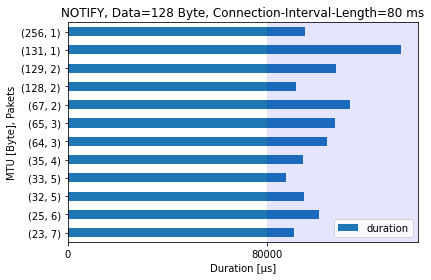

In [304]:
subplot = df_mtu.set_index(["mtu_size","pakets"]).plot(y=["duration"],kind="barh",xlabel="MTU, Pakets")
step = int(df_mtu_conn_interval_values[0]*1_000)
if math.ceil(int(df_mtu['duration'].max())/step) <= 6:
    subplot.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(step))
elif math.ceil(int(df_mtu['duration'].max())/step) <= 10:
    subplot.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(step))
else:
    subplot.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(4*step))
subplot.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(step))
subplot.set_title("NOTIFY, Data=%d Byte, Connection-Interval-Length=%d ms"%(df_mtu_data_size_values[0],df_mtu_conn_interval_values[0]))
for i in range(step,int(df_mtu['duration'].max()),step*2):
    rect = patches.Rectangle((i, -10), step, 512, linewidth=0.5, edgecolor='black', facecolor='blue',alpha=0.1)
    subplot.add_patch(rect)
plt.legend(loc="lower right")
plt.xlabel("Duration [µs]")
plt.ylabel("MTU [Byte], Pakets")
plt.tight_layout()
plt.savefig("outputs/notify_mtu_change_128")
plt.show()

Die Grafik bestätigt die Formel xy, zeigt aber auch, dass die Anzahl der Pakete, beziehungsweise die Größe der MTU Pakete scheinbar keinen Einfluss auf die Übertragung haben. Abbildung xx, zeigt aber, dass es bei einem kürzeren Connection-Interval durchaus vorkommen kann, dass nicht alle Pakete in einem Connection-Interval übertragen werden können. Dafür wird im folgenden Kapitel das Connection-Interval bei gleichbleibender Paketanzahl und Paketgröße, verändert.

Mit Formel xy ergeben sich ähnlich zum Read-Ansatz folgende Intervalle:  
$\text{Anzahl der Pakete}=\begin{cases}
1	& 131 <= MTU < 255 \\
2	& 67 <= MTU < 131 \\
3	& 46 <= MTU < 67 \\
4	& 35 <= MTU < 46 \\
5	& 29 <= MTU < 35 \\
6	& 25 <= MTU < 29 \\
7	& 23 <= MTU < 25 \\
\end{cases}$

## Connection-Interval

Aus den verschiedenen Abbildungen für den Notify Ansatz in Abbildung 7.2 geht hervor, dass die Pakete in den meisten Fällen in einem oder zwei Intervallen übertragen werden können. Es zeigt sich dass bei längeren Intervallen unter umständen weniger Intervalle benötigt werden. Das bedeutet, in kürzeren Intervallen können nicht alle Pakete vollständig übertragen werden und werden erst im folgenden Sende-Intervall übertragen. Wenn das Intervall größer ist, können alle Pakete übertragen werden. Aus diesem Grund werden die Intervalle für die folgenden Versuche bei gleicher Daten- und MTU-Größe, also gleichbleibender Paketgröße verändert. 

In [305]:
df_interval_table = df_interval[["pakets","duration","data_size","conn_interval"]].rename(dict({"data_size":"data","conn_interval":"Connection-Interval"}),axis=1)
# to format for better understanding
#df_interval_table["Connection-Interval"] = df_interval_table["Connection-Interval"].apply(lambda x:str(x*1.25)+" ms")
df_interval_table = df_interval_table.groupby(["data","Connection-Interval"]).min().reset_index()
#df_interval_table["used intervals"] = round(df_interval_table["duration"] / (df_interval_table["Connection-Interval"]*1.25*1_000),2)
df_interval_table = df_interval_table.pivot(index="Connection-Interval",columns=["data"],values=["duration"])

text = df_interval_table.to_latex(label="table:notifydetailconnectionintervalchange",caption="Notify-Ansatz Connection-Interval Variationen")
text = format_table_text(text)
with open("outputs/notify_connection_interval_change.tex", "w") as text_file:
    text_file.write(text)
df_interval_table

duration         
data                     128      512
Connection-Interval                  
45.0                   52784   144456
80.0                   94075   175119
160.0                 199770   330256
320.0                 465667   780317
640.0                 983946   675516
1280.0               1607530  2412660

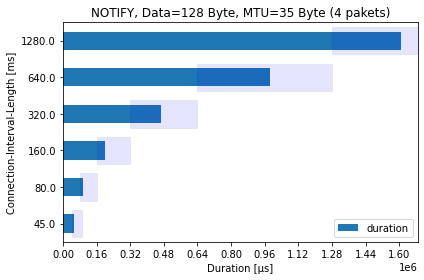

In [306]:
mtu = df_interval_mtu_values[0]
data = min(df_interval_data_size_values)
expected_conn_intervals = paket_func(data,mtu)
df_interval_plot = df_interval[df_interval["data_size"] == data]
df_interval_plot = df_interval_plot[["conn_interval","duration"]].groupby(["conn_interval"]).min().reset_index(drop=False)
subplot = df_interval_plot.plot(x="conn_interval",y="duration",kind="barh",xlabel="Connection-Interval-Length [ms]")
subplot.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(df_interval_conn_interval_values[2]*1_000))
subplot.set_title("NOTIFY, Data=%d Byte, MTU=%d Byte (%d pakets)"%(data,mtu,expected_conn_intervals))
plt.xlabel("Duration [µs]")
for index,df_tmp in df_interval_plot.iterrows():
    interval = df_tmp["conn_interval"]
    step = int(interval*1000)
    for j in range(step,int(df_tmp["duration"]),step*2):
        rect = patches.Rectangle((j, index-0.375), step, 0.75, linewidth=0.5, edgecolor='black', facecolor='blue',alpha=0.1)
        subplot.add_patch(rect)
plt.tight_layout()
plt.savefig("outputs/notify_connection_interval_change_128")


Für diesen Versuch wirkt es so, als ob die Länge des Connection-Interval sich auf die Dauer wie beim Read-Ansatz auswirkt. Die Dauer der Übertragung steigt proportional mit der Länge des Intervalls. 

Das gilt aber nur für den Fall, dass nur ein Connection-Interval benötigt wird. Grund hierfür ist, dass die Dauer bis zum Sende-Interval des Peripheral in etwa die Länge eines Connection-Interval beträgt.

Um zu Untersuchen wann mehrere Intervalle benötigt werden, wird der Versuch mit weiteren Werten wiederholt.
Um die Paketanzahl zu erhöhen, werden die Pakete von 4 auf 16 erhöht. Dafür wurde die Datengröße von 128 Byte auf 512 Byte gesetzt und die gleiche MTU-Größe verwendet.

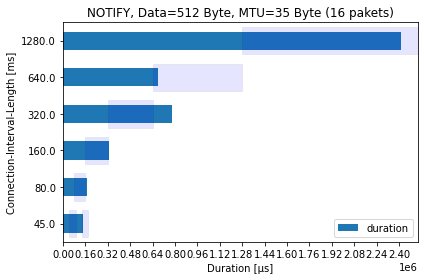

In [307]:
mtu = df_interval_mtu_values[0]
data = max(df_interval_data_size_values)
expected_conn_intervals = paket_func(data,mtu)
df_interval_plot = df_interval[df_interval["data_size"] == data]
df_interval_plot = df_interval_plot[["conn_interval","duration"]].groupby(["conn_interval"]).min().reset_index(drop=False)
subplot = df_interval_plot.plot(x="conn_interval",y="duration",kind="barh",xlabel="Connection-Interval-Length [ms]")
subplot.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(df_interval_conn_interval_values[2]*1_000))
subplot.set_title("NOTIFY, Data=%d Byte, MTU=%d Byte (%d pakets)"%(data,mtu,expected_conn_intervals))
plt.xlabel("Duration [µs]")
for index,df_tmp in df_interval_plot.iterrows():
    interval = df_tmp["conn_interval"]
    step = int(interval*1000)
    for j in range(step,int(df_tmp["duration"]),step*2):
        rect = patches.Rectangle((j, index-0.375), step, 0.75, linewidth=0.5, edgecolor='black', facecolor='blue',alpha=0.1)
        subplot.add_patch(rect)
plt.tight_layout()
plt.savefig("outputs/notify_connection_interval_change_512")


Hier zeigt sich, nur für ein Intervall von 45 ms werden mehrere Intervalle benötigt. Für alle anderen Intervalllängen können die 16 Pakete in einem Intervall übertragen werden. Daraus lässt sich folgern, dass die Anzahl der Intervalle nicht durch die Anzahl der Pakete, sondern durch die Anzahl der Bytes beschränkt wird. 

Das wiederlegt auch die Annahme des Blogs "Throughput".

### TODO:

In [308]:
# make Experiment with lower MTU size, to increase Paket amount

##### Theoretisch müsste man jetzt alle Variationen aus MTU & Datengröße überprüfen, das übersteigt aber diese Arbeit. Als Ergebniss kann man sagen, dass bei größeren Intervallen 

### IDEE:

Um zu untersuchen, wie viele Pakete pro Interval gesendet werden können, könnte man die Wireshark Traces anschauen, die Pakete pro Intervall zählen.  
BpI = Byte pro Interval(Intervall-größe)

BpI = Pakete * MTU

Pakete = MTU / BpI

Für 45 ms Intervall, MTU = 35, Data = 512:  
BpI(45) = 15 * 35  
Für 40 ms Intervall, MTU = 29, Data = 512:  
BpI(45) = Pakete * 29  

aus BpI(45) Werten kann max wert genommen werden.  
=> Nachteil, ist sehr aufwändig